<a href="https://colab.research.google.com/github/ER-prashant-kumawat/BankManagementSystem/blob/main/chatgpt7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/Symptom-severity.csv")

In [14]:
print(df.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [15]:
print(df.shape)

(133, 2)


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [17]:
print(df.isnull().sum())
df['weight'] = df['weight'].fillna(df['weight'].mean())

Symptom    0
weight     0
dtype: int64


In [18]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


In [19]:
df['Symptom'] = df['Symptom'].str.lower().str.replace("_"," ")

In [20]:
df_sorted = df.sort_values(by = 'weight',ascending = False)
print(df_sorted.head())

                 Symptom  weight
113                 coma       7
46   swelling of stomach       7
56            chest pain       7
57     weakness in limbs       7
25            high fever       7


In [21]:
high_severity = df[df['weight'] >= 6]
print(high_severity)

                      Symptom  weight
12        burning micturition       6
13         spotting urination       6
22          patches in throat       6
25                 high fever       7
40                  diarrhoea       6
44        acute liver failure       6
45             fluid overload       6
46        swelling of stomach       7
47        swelled lymph nodes       6
48                    malaise       6
56                 chest pain       7
57          weakness in limbs       7
60        pain in anal region       6
62         irritation in anus       6
71           enlarged thyroid       6
84         spinning movements       6
91   continuous feel of urine       6
101     abnormal menstruation       6
102        dischromic patches       6
113                      coma       7
114          stomach bleeding       6
119   prominent veins on calf       6


In [22]:
group_data = df.groupby('weight').count()
print(group_data)

        Symptom
weight         
1             1
2            15
3            21
4            39
5            35
6            17
7             5


In [23]:
weights = np.array(df['weight'])
print("Mean:", np.mean(weights))
print("Max:", np.max(weights))
print("Min:",np.min(weights))

Mean: 4.225563909774436
Max: 7
Min: 1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

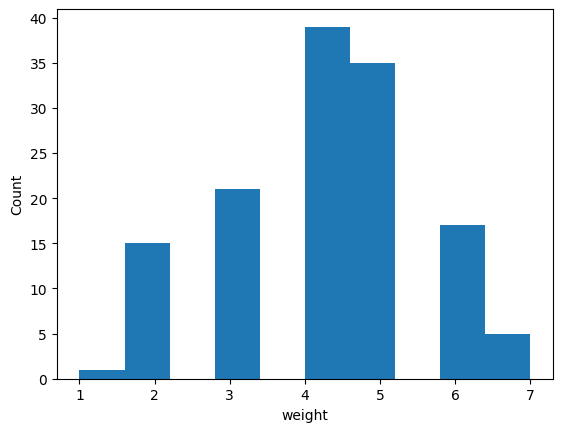

In [24]:
plt.figure()
plt.hist(df['weight'])
plt.xlabel("weight")
plt.ylabel("Count")
plt

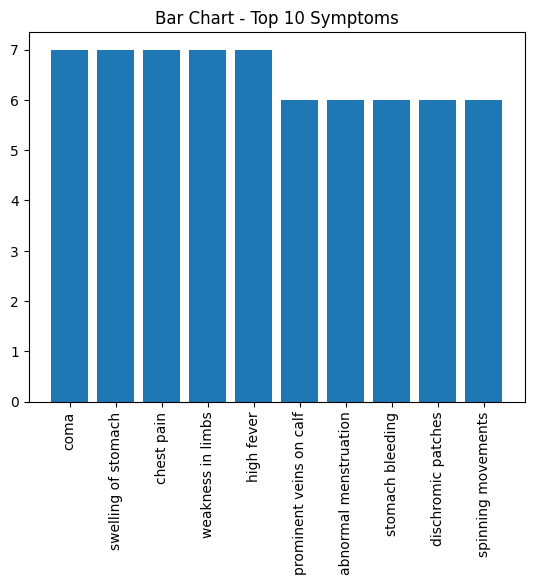

In [25]:
top10 = df_sorted.head(10)
plt.figure()
plt.bar(top10['Symptom'], top10['weight'])
plt.xticks(rotation=90)
plt.title("Bar Chart - Top 10 Symptoms")
plt.show()

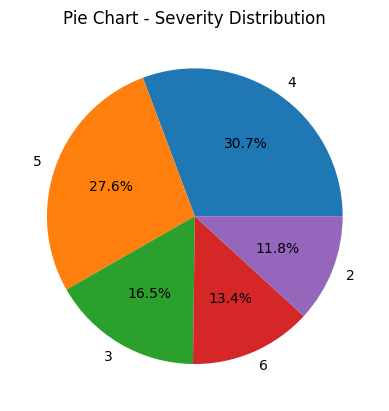

In [26]:
severity_count = df['weight'].value_counts().head(5)
plt.figure()
plt.pie(severity_count, labels=severity_count.index, autopct='%1.1f%%')
plt.title("Pie Chart - Severity Distribution")
plt.show()

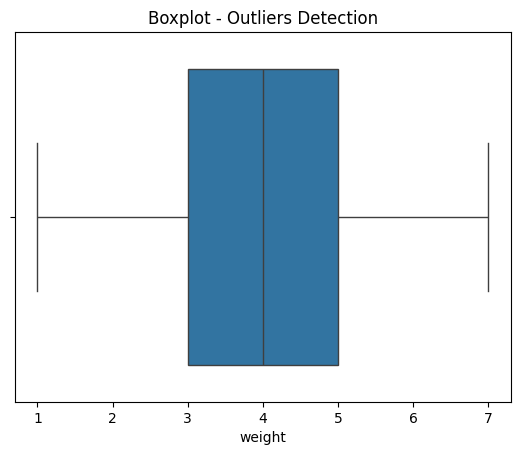

In [27]:
plt.figure()
sns.boxplot(x=df['weight'])
plt.title("Boxplot - Outliers Detection")
plt.show()

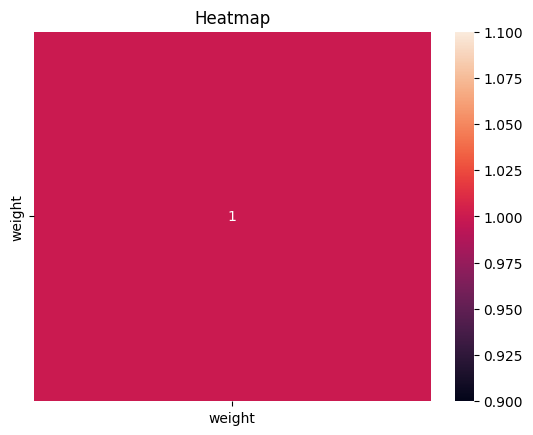

In [28]:
corr = df[['weight']].corr()
sns.heatmap(corr, annot=True)
plt.title("Heatmap")
plt.show()

In [29]:
severity_map = pd.DataFrame({
    'weight': [1,2,3,4,5,6,7],
    'severity_level': ['Very Low','Low','Medium','Medium','High','Very High','Critical']
})

merged_df = pd.merge(df, severity_map, on='weight', how='left')
print(merged_df.head())



                Symptom  weight severity_level
0               itching       1       Very Low
1             skin rash       3         Medium
2  nodal skin eruptions       4         Medium
3   continuous sneezing       4         Medium
4             shivering       5           High


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib

In [31]:
encoder = LabelEncoder()
df['Symptom_encoded'] = encoder.fit_transform(df['Symptom'])

In [32]:
x = df[['Symptom_encoded']]
y = df['weight']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
model = Sequential()
model.add(Dense(16,activation = 'relu', input_shape = (1,)))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = 'mse',
    metrics = ['mae']
)

In [36]:
model.fit(
    X_train,y_train,
    epochs = 100,
    batch_size = 32,
    validation_data = (X_test,y_test)
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 796.1952 - mae: 23.2658 - val_loss: 64.6582 - val_mae: 6.7547
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 37.3327 - mae: 4.7609 - val_loss: 23.2242 - val_mae: 4.6816
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 37.2768 - mae: 5.7812 - val_loss: 73.2792 - val_mae: 8.1584
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 72.6090 - mae: 8.1676 - val_loss: 45.1109 - val_mae: 6.5039
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 38.0069 - mae: 5.8651 - val_loss: 8.8659 - val_mae: 2.3537
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.8679 - mae: 2.1856 - val_loss: 23.0607 - val_mae: 4.2534
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 18.5431 - mae: 3.5888 - val_loss: 26.5613 - val_mae: 4.5327
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 18.0776 - mae: 3.5619 - val_loss: 12.0289 - val_mae: 3.0772
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - los

In [37]:
# -------- SAVE MODEL (.h5) --------
model.save("symptom_severity_model.h5")

# Save encoder (VERY IMPORTANT)
joblib.dump(encoder, "symptom_encoder.pkl")

print("✅ Model saved as symptom_severity_model.h5")

✅ Model saved as symptom_severity_model.h5


In [11]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import joblib

model = load_model(
    "/content/symptom_severity_model.h5",
    custom_objects={"mse": tf.keras.losses.MeanSquaredError()}
)

encoder = joblib.load("/content/symptom_encoder.pkl")

print("✅ Model Loaded with custom mse")


✅ Model Loaded with custom mse


In [14]:
def generate_response(symptom, severity):

    if severity <= 2:
        return f"""
🟢 Symptom: {symptom}
Severity Level: LOW

✔ Home remedies suggested
✔ Take rest
✔ Drink plenty of water
"""

    elif severity <= 4:
        return f"""
🟡 Symptom: {symptom}
Severity Level: MEDIUM

⚠ Take precautions
⚠ Avoid junk food
⚠ Consult doctor if continues
"""

    elif severity <= 6:
        return f"""
🟠 Symptom: {symptom}
Severity Level: HIGH

🚨 Doctor consultation recommended
🚨 Avoid stress
"""

    else:
        return f"""
🔴 Symptom: {symptom}
Severity Level: CRITICAL

❗ Immediate medical attention required
❗ Visit hospital ASAP
"""


In [15]:
print(" Medical Chatbot Started")
print("Type 'exit' to stop\n")

while True:
    user_input = input(" You: ").lower()

    if user_input == "exit":
        print(" Chatbot Closed. Stay Healthy!")
        break

    try:
        # Encode symptom
        encoded = encoder.transform([user_input])

        # Predict severity
        prediction = model.predict(
            np.array(encoded).reshape(-1, 1)
        )

        severity = round(prediction[0][0])

        # Generate chatbot response
        reply = generate_response(user_input, severity)
        print(reply)

    except:
        print("""
❌ Symptom not recognized
✔ Example: itching, headache, fever
""")


🤖 Medical Chatbot Started
Type 'exit' to stop

👤 You: skin_rash

❌ Symptom not recognized
✔ Example: itching, headache, fever

👤 You: itching
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

🟡 Symptom: itching
Severity Level: MEDIUM

⚠ Take precautions
⚠ Avoid junk food
⚠ Consult doctor if continues

👤 You: nodal_skin_eruptions

❌ Symptom not recognized
✔ Example: itching, headache, fever

👤 You: shivering
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

🟠 Symptom: shivering
Severity Level: HIGH

🚨 Doctor consultation recommended
🚨 Avoid stress

👤 You: stomach_pain

❌ Symptom not recognized
✔ Example: itching, headache, fever

👤 You: muscle_wasting

❌ Symptom not recognized
✔ Example: itching, headache, fever

👤 You: vomiting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

🟠 Symptom: vomiting
Severity Level: HIGH

🚨 Doctor consultation recommended
🚨 Avoid stress

👤 You: burning_micturition

❌ Symptom not recognized
✔ Example: itching, headache, fever

👤 You: spotting_urination

❌ Symptom not recognized
✔ Example: 